##Decision Tree:

Dependencies:

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score
import seaborn as sns

Dataset:

In [ ]:
df = sns.load_dataset("titanic")

In [ ]:
df.head(3)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True


In [ ]:
df2 = df.drop(columns=["deck", "adult_male", "alive", "alone"], inplace=False)
df2.head(3)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,embark_town
0,0,3,male,22.0,1,0,7.2500,S,Third,man,Southampton
1,1,1,female,38.0,1,0,71.2833,C,First,woman,Cherbourg
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,Southampton


In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  embark_town  889 non-null    object  
dtypes: category(1), float64(2), int64(4), object(4)
memory usage: 70.7+ KB


Encoding:

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
for i in df2.columns:
    if df2[i].dtype == "object":
        df2[i] = LabelEncoder().fit_transform(df2[i])

In [ ]:
df2.head(3)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,embark_town
0,0,3,1,22.0,1,0,7.2500,2,Third,1,2
1,1,1,0,38.0,1,0,71.2833,0,First,2,0
2,1,3,0,26.0,0,0,7.9250,2,Third,2,2


In [ ]:
for i in df2.columns:
    if df2[i].dtype == "category":
        df2[i] = LabelEncoder().fit_transform(df2[i])

In [ ]:
df2.head(3)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,embark_town
0,0,3,1,22.0,1,0,7.2500,2,2,1,2
1,1,1,0,38.0,1,0,71.2833,0,0,2,0
2,1,3,0,26.0,0,0,7.9250,2,2,2,2


In [ ]:
# Fill missing values with column mean
for i in df2.columns:
    if df2[i].dtype == "float64":
      df2[i] = df2[i].fillna(df2[i].mean())

In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   survived     891 non-null    int64  
 1   pclass       891 non-null    int64  
 2   sex          891 non-null    int64  
 3   age          891 non-null    float64
 4   sibsp        891 non-null    int64  
 5   parch        891 non-null    int64  
 6   fare         891 non-null    float64
 7   embarked     891 non-null    int64  
 8   class        891 non-null    int64  
 9   who          891 non-null    int64  
 10  embark_town  891 non-null    int64  
dtypes: float64(2), int64(9)
memory usage: 76.7 KB


Splitting the dataset:

In [ ]:
# Split into features (X) and target (y)
X = df2.drop(columns=["survived"])
y = df2["survived"]

# OR

# X = df[df.columns[1:]]  # All columns except 'Survived'
# y = df['Survived']  # Target variable

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((712, 10), (179, 10), (712,), (179,))

Train the DT model:

In [ ]:
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

DecisionTreeClassifier()

Make predictions on test data:

In [ ]:
y_pred = dt.predict(X_test)

In [ ]:
y_pred

array([0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 1, 1])

In [ ]:
y_pred.shape

(179,)

Confusion Matrix:

[[84 21]
 [20 54]]


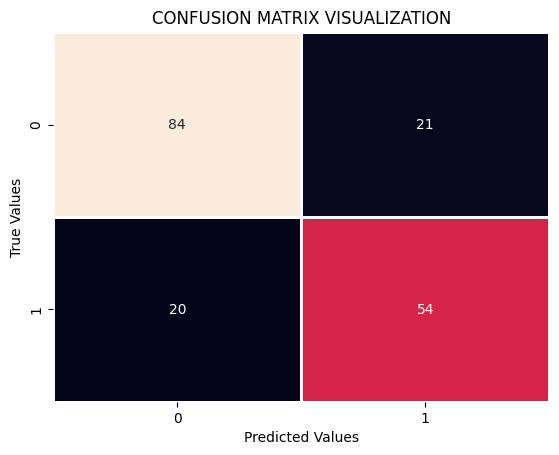

In [ ]:
from sklearn.metrics import confusion_matrix
conf = confusion_matrix(y_test, y_pred)
print(conf)

# Visualizing confusion matrix using seaborn
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, lw=2, cbar=False)
plt.ylabel("True Values")
plt.xlabel("Predicted Values")
plt.title("CONFUSION MATRIX VISUALIZATION")
plt.show()

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, f1_score, recall_score, precision_score

# Calculate Accuracy
acc = accuracy_score(y_test, y_pred)
print("Accuracy:", acc)

# Generate Classification Report
res = classification_report(y_test, y_pred)
print(res)

# Calculate F1-score
# f1 = f1_score(y_test, y_pred)
# print(f1)

# # Calculate Recall Score
# recall = recall_score(y_test, y_pred)
# print(recall)

# # Calculate Precision Score
# precision = precision_score(y_test, y_pred)
# print(precision)

Accuracy: 0.7653631284916201
              precision    recall  f1-score   support

           0       0.81      0.79      0.80       105
           1       0.71      0.73      0.72        74

    accuracy                           0.77       179
   macro avg       0.76      0.76      0.76       179
weighted avg       0.77      0.77      0.77       179



##Naïve Bayes:

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# Initialize Gaussian Naive Bayes model
nb = GaussianNB()

# Train the model on the training dataset
nb.fit(X_train, y_train)

GaussianNB()

In [ ]:
# Make predictions on the test dataset
y_pred = nb.predict(X_test)

[[82 23]
 [17 57]]


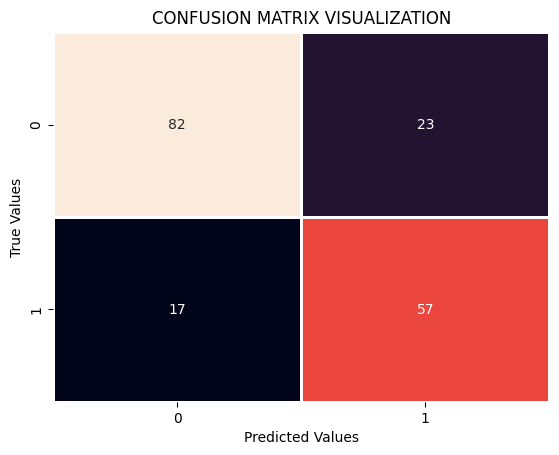

In [ ]:
# Generate and print confusion matrix
conf = confusion_matrix(y_test, y_pred)
print(conf)

# Visualizing the confusion matrix using seaborn
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, lw=2, cbar=False)
plt.ylabel("True Values")
plt.xlabel("Predicted Values")
plt.title("CONFUSION MATRIX VISUALIZATION")
plt.show()

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, f1_score, recall_score, precision_score

# Calculate Accuracy
nb_acc = accuracy_score(y_test, y_pred)
print("Naive Bayes Accuracy:", nb_acc)

# Generate Classification Report
res2 = classification_report(y_test, y_pred)
print(res2)

# Calculate F1-score
# f1 = f1_score(y_test, y_pred)
# print(f1)

# # Calculate Recall Score
# recall = recall_score(y_test, y_pred)
# print(recall)

# # Calculate Precision Score
# precision = precision_score(y_test, y_pred)
# print(precision)

Naive Bayes Accuracy: 0.776536312849162
              precision    recall  f1-score   support

           0       0.83      0.78      0.80       105
           1       0.71      0.77      0.74        74

    accuracy                           0.78       179
   macro avg       0.77      0.78      0.77       179
weighted avg       0.78      0.78      0.78       179

